In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("retail_sales_dataset.csv")

In [3]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [4]:
df["Product Category"].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [7]:
sales_by_category=df.groupby("Product Category")["Total Amount"].sum().reset_index()

In [8]:
sales_by_category

,Product Category,Total Amount
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


<Axes: xlabel='Product Category', ylabel='Total Amount'>

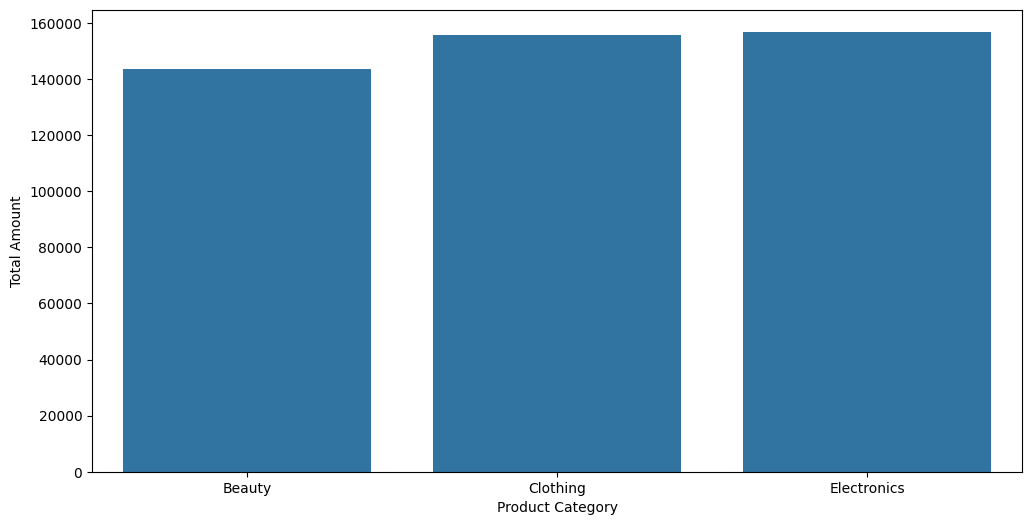

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_category,x="Product Category",y="Total Amount")

([<matplotlib.patches.Wedge at 0x21e9884b510>,
 [Text(0.6047166402794314, 0.9188676645573925, 'Beauty'),
  Text(-1.0953227959456293, 0.10133100553063501, 'Clothing'),
  Text(0.5175001243513877, -0.9706665860615057, 'Electronics')],
 [Text(0.3298454401524171, 0.5012005443040323, '31.5%'),
  Text(-0.597448797788525, 0.05527145756216455, '34.1%'),
  Text(0.2822727951007569, -0.5294545014880939, '34.4%')])

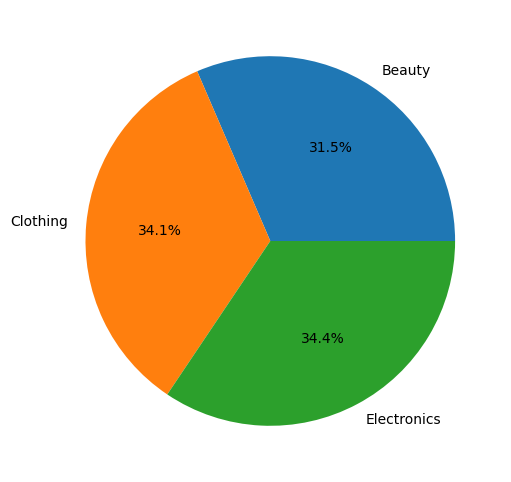

In [19]:
plt.figure(figsize=(12,6))
plt.pie(sales_by_category["Total Amount"],labels=sales_by_category["Product Category"],autopct="%1.1f%%")

In [20]:
sales=df.groupby(["Product Category","Gender"])["Total Amount"].sum().reset_index()

In [21]:
sales

,Product Category,Gender,Total Amount
0,Beauty,Female,74830
1,Beauty,Male,68685
2,Clothing,Female,81275
3,Clothing,Male,74305
4,Electronics,Female,76735
5,Electronics,Male,80170


<Figure size 1600x900 with 0 Axes>

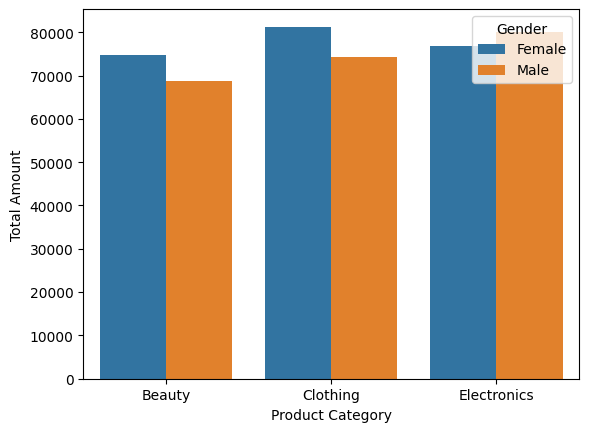

<Figure size 1600x900 with 0 Axes>

In [35]:
sns.barplot(sales, x="Product Category",y="Total Amount",hue="Gender",estimator=sum)
plt.figure(figsize=(16,9))

In [39]:
sales_pivot=sales.pivot(index="Product Category",columns="Gender",values="Total Amount")
sales_pivot

Gender,Female,Male
Product Category,,
Beauty,74830,68685
Clothing,81275,74305
Electronics,76735,80170


<Axes: xlabel='Product Category'>

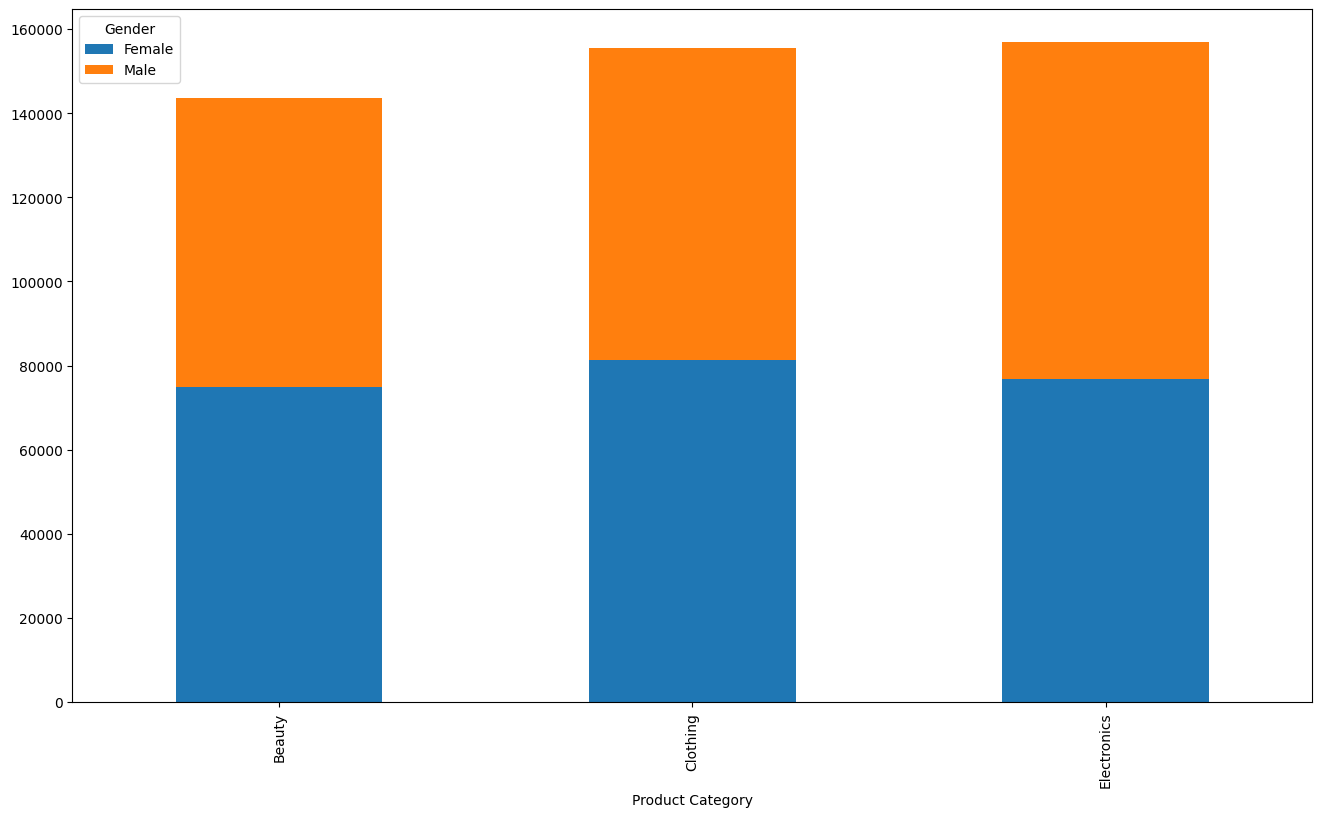

In [38]:
sales_pivot.plot(kind="bar",stacked=True,figsize=(16,9))